# Regression Exercises

In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
file = "https://gist.githubusercontent.com/ryanorsinger/14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
df = pd.read_csv(file)


In [5]:
df

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97
...,...,...,...,...,...
99,100,70.0,65,78,77
100,101,62.0,70,79,70
101,102,58.0,65,70,68
102,103,57.0,65,75,65


In [6]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [8]:
df.shape

(104, 5)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,104.0,52.500000,30.166206,1.0,26.75,52.5,78.25,104.0
exam1,103.0,78.621359,14.260955,57.0,70.00,79.0,92.00,100.0
exam2,104.0,77.307692,10.295703,65.0,70.00,75.0,89.00,93.0
final_grade,104.0,81.692308,10.918122,65.0,72.00,81.0,93.00,97.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


## Takeaways
- exam1 includes 1 null value
- exam1 and exam3 both have a dtype other than int64
- Need to decide to remove or impute a value if necessary for exam1 and exam3

In [18]:
df.isnull().any()

student_id     False
exam1           True
exam2          False
exam3          False
final_grade    False
dtype: bool

In [21]:
df.columns[df.isnull().any()]

Index(['exam1'], dtype='object')

In [22]:
df.exam3.value_counts(dropna=False, ascending=True)

       1
95     8
87     8
86     8
85     8
94     8
79     8
70     8
75    15
96    16
78    16
Name: exam3, dtype: int64

In [24]:
df = df.replace(r'^\s*$', np.nan, regex=True)
# replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [26]:
# Drop all arows with any Null values, assign to df, and verify.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [38]:
df = df.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int32
 1   exam1        102 non-null    int32
 2   exam2        102 non-null    int32
 3   exam3        102 non-null    int32
 4   final_grade  102 non-null    int32
dtypes: int32(5)
memory usage: 6.9 KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,102.0,53.313725,29.886909,1.0,28.25,53.5,78.75,104.0
exam1,102.0,78.833333,14.167375,57.0,70.00,79.0,92.00,100.0
exam2,102.0,77.500000,10.297313,65.0,70.00,75.0,89.00,93.0
exam3,102.0,84.294118,8.736617,70.0,78.00,85.0,94.00,96.0
final_grade,102.0,81.970588,10.833991,65.0,72.00,81.0,93.00,97.0


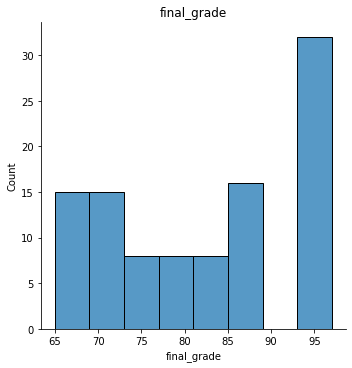

In [45]:
sns.displot(x='final_grade', data=df)

plt.title('final_grade')
plt.show()